# Import Libraries

In [87]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas
from datasist.structdata import detect_outliers


# Read the dataset

In [3]:
df=pd.read_excel("Hotels.xlsx")

In [4]:
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019"
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019"
2,CODE|87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019"
3,CODE|87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019"
4,CODE|87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019"


#  1) PREPROCESSING

# Getting info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        2509 non-null   object
 1   Hotel Name  2509 non-null   object
 2   Roomnights  2509 non-null   int64 
 3   Sale        2509 non-null   int64 
 4   Cost        2509 non-null   int64 
 5   Date        2509 non-null   object
dtypes: int64(3), object(3)
memory usage: 117.7+ KB


## Date column datatype is object (string) so we want to cast it to datetime dtype to extract features from it

In [6]:
df["Date"].unique().tolist()

['01, 2019',
 '08, 2019',
 '06, 2019',
 '12, 2019',
 '11, 2019',
 '02, 2019',
 '09, 2019',
 '07, 2019',
 '03, 2019',
 '04, 2019',
 '05, 2019',
 '10, 2019',
 '09, 2020',
 '07, 2020',
 '11, 2020']

In [7]:
df['Date']=pd.to_datetime(df['Date'], format="%m, %Y", errors='ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Code        2509 non-null   object        
 1   Hotel Name  2509 non-null   object        
 2   Roomnights  2509 non-null   int64         
 3   Sale        2509 non-null   int64         
 4   Cost        2509 non-null   int64         
 5   Date        2509 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 117.7+ KB



### Ok the datatype of Time column is now datetime, so lets extract features.

In [9]:
df["Date"].unique()

array(['2019-01-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

# create column of month

In [10]:
df["month"]= df['Date'].dt.month

In [11]:
df["month"]

0        1
1        8
2        1
3        6
4       12
        ..
2504     1
2505     4
2506    11
2507     9
2508     4
Name: month, Length: 2509, dtype: int64

# create column of year

In [12]:
df["year"]=df['Date'].dt.year

In [13]:
df["year"]

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2504    2019
2505    2019
2506    2019
2507    2019
2508    2019
Name: year, Length: 2509, dtype: int64

# check duplicated values

In [14]:
df.duplicated().sum()

9

In [15]:
df[df.duplicated()]

,Code,Hotel Name,Roomnights,Sale,Cost,Date,month,year
32,CODE|86766,Best Western Plus Suites Hotel,1302,26040,19530,2019-09-01,9,2019
34,CODE|86731,Best Western Plus Suitcase Paris La Défense,1900,45600,30400,2019-05-01,5,2019
36,CODE|86696,Best Western Plus Stovall's Inn,1313,38077,23634,2019-02-01,2,2019
164,CODE|82251,BEST WESTERN PLUS Executive Hotel and Suites,793,18239,15067,2019-02-01,2,2019
166,CODE|82216,Best Western Plus Executive Court Inn & Confer...,435,9570,8700,2019-05-01,5,2019
2232,CODE|9556,AC Hotel Paris Porte Maillot,473,12771,8041,2019-07-01,7,2019
2234,CODE|9521,AC Hotel Palencia,194,5820,2910,2019-10-01,10,2019
2236,CODE|9486,AC Hotel Palau de Bellavista,759,18975,12903,2019-11-01,11,2019
2481,CODE|946,Conrad Koh Samui Residences,1100,29700,20900,2019-02-01,2,2019


## drop duplicates

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Code        2500 non-null   object        
 1   Hotel Name  2500 non-null   object        
 2   Roomnights  2500 non-null   int64         
 3   Sale        2500 non-null   int64         
 4   Cost        2500 non-null   int64         
 5   Date        2500 non-null   datetime64[ns]
 6   month       2500 non-null   int64         
 7   year        2500 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 175.8+ KB


### reset index after drop

In [18]:
df.reset_index(inplace=True,drop=True)

# Create column of profit 

## profit = sale - cost 

In [61]:
df["profit"]= df["Sale"] - df["Cost"]

## - Hotel Name

In [20]:
df[['Code', 'Hotel Name']].head(25)

,Code,Hotel Name
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin
2,CODE|87781,Best Western Premier Agung Resort Ubud
3,CODE|87746,Best Western Posada Freeman
4,CODE|87711,Best Western Pony Soldier Inn & Suites
5,CODE|87676,"BEST WESTERN PLUS, Doha"
6,CODE|87641,Best Western Plus Zanzibar
7,CODE|87606,Best Western Plus Winslow Inn
8,CODE|87571,Best Western Plus Wine Country Inn & Suites
9,CODE|87536,Best Western Plus Windsor Inn


# - Extracting Country name from the hotel name

## 1) By using geopy 

In [21]:
geolocator = Nominatim(user_agent="Hotels Data analysis")

In [22]:


def getLocationByGeo(hotelname):
    #geolocator = Nominatim(user_agent='my-application')
    try:
        location = geolocator.geocode(hotelname)
        address=location.raw["display_name"].split(',')[-1]
        return address
    except:
        return "missing" 
       

In [23]:
df['geocode']=df["Hotel Name"].apply(getLocationByGeo)

In [24]:
df["geocode"].value_counts()

missing           1476
 United States     183
 Deutschland        61
 Italia             54
 Türkiye            53
                  ... 
 Malta               1
 Bénin               1
 Chile               1
 Costa Rica          1
 لبنان               1
Name: geocode, Length: 96, dtype: int64

In [25]:
df[df['geocode']=="missing"]["Hotel Name"]

0       Best Western Premier Al Ahsa Grand Hotel & Suites
2                  Best Western Premier Agung Resort Ubud
5                                 BEST WESTERN PLUS, Doha
6                              Best Western Plus Zanzibar
10               Best Western Plus White Bear Country Inn
                              ...                        
2495                                  Al Hail Waves Hotel
2496                Al Eairy Furnished Apartments Tabuk 6
2497                                     Al Bandar Rotana
2498             Aiden by Best Western @ Scottsdale North
2499                  Adagio Aparthotel Jeddah Malik Road
Name: Hotel Name, Length: 1476, dtype: object

## 2) By useing  geopandas to get country name in which geopy failed to obtain 

In [35]:
def return_country (row):
    try:
        x=geopandas.tools.geocode(row)["address"].tolist()[0].split(", ")[-1]
        return x
    except:
        return "missing"
        

In [36]:
df["country"]=df["Hotel Name"].apply(return_country)

In [37]:
df['country'].value_counts().sort_values(ascending=False)

United States     426
missing           335
France            156
España            155
United Kingdom    112
                 ... 
Jamaica             1
Việt Nam            1
Бългaрия            1
Sénégal             1
Ecuador             1
Name: country, Length: 134, dtype: int64

In [38]:
df[(df['geocode']=="missing")& (df['country']=="missing")]

,Code,Hotel Name,Roomnights,Sale,Cost,Date,month,year,geocode,country
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,2019-01-01,1,2019,missing,missing
44,CODE|86311,Best Western PLUS Roswell/Alpharetta,791,22148,12656,2019-07-01,7,2019,missing,missing
54,CODE|85961,Best Western Plus Peterborough Orton Hall Hote...,99,2178,1782,2019-10-01,10,2019,missing,missing
67,CODE|85506,Best Western Plus Ottawa Kanata Hotel & Confer...,167,4342,3173,2019-03-01,3,2019,missing,missing
107,CODE|84106,Best Western Plus Kissimmee-Lake Buena Vista S...,849,22074,12735,2019-04-01,4,2019,missing,missing
...,...,...,...,...,...,...,...,...,...,...
2479,CODE|701,"Bournemouth Carlton Hotel, BW Signature Colle...",1095,27375,16425,2019-03-01,3,2019,missing,missing
2486,CODE|69581,Best Western Orlando Theme Parks,1369,35594,20535,2019-03-01,3,2019,missing,missing
2489,CODE|69476,"Aristocrat Hotel, BW Signature Collection",1541,32361,24656,2019-05-01,5,2019,missing,missing
2496,CODE|106,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,2019-04-01,4,2019,missing,missing


In [70]:
df['country'].unique().tolist()

['missing',
 'United States',
 'México',
 'قطر',
 'United Kingdom',
 'France',
 'Sverige',
 'Canada',
 'الإمارات العربية المتحدة',
 'Հայաստան',
 'Norge',
 'Italia',
 'Bangladesh',
 'România',
 'Philippines',
 'Türkiye',
 'Indonesia',
 'ประเทศไทย',
 'Österreich',
 'Danmark',
 'Deutschland',
 'Australia',
 'Северна Македонија',
 'Sierra Leone',
 'South Africa',
 'Nicaragua',
 '中国',
 'Tanzania',
 'Jersey',
 'Ghana',
 'Suomi',
 'Brasil',
 'Slovensko',
 'Colombia',
 'España',
 'Kenya',
 'ශ්\u200dරී ලංකාව இலங்கை',
 'Nederland',
 'پاکستان',
 'Malaysia',
 'Azərbaycan',
 'Sesel',
 'السعودية',
 'Hrvatska',
 'Latvija',
 'Guinée',
 'ދިވެހިރާއްޖެ',
 'India',
 'Cuba',
 'Србија',
 'Malta',
 'Κύπρος - Kıbrıs',
 'Turks and Caicos Islands',
 'عمان',
 'ישראל',
 'Shqipëria',
 'Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر',
 'Chile',
 'República Dominicana',
 'Ελλάς',
 'Magyarország',
 'The Bahamas',
 'Cameroun',
 'Djibouti جيبوتي',
 'Schweiz/Suisse/Svizzera/Svizra',
 'مصر',
 'Portugal',
 'اليمن',
 'Venezuela',
 'Guatemala

## as it show that geopandas reduce missing country from 1476 to 335

In [39]:
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date,month,year,geocode,country
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,2019-01-01,1,2019,missing,missing
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,2019-08-01,8,2019,Deutschland,missing
2,CODE|87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,2019-01-01,1,2019,missing,United States
3,CODE|87746,Best Western Posada Freeman,1294,38820,25880,2019-06-01,6,2019,México,México
4,CODE|87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,2019-12-01,12,2019,United States,United States


In [46]:
def get_country (data):
    if (data["geocode"]=="missing") and (data["country"]=="missing"):
        return "missing"
    elif (data["geocode"]=="missing") and (data["country"]!="missing"):
        return data["country"]
    elif (data["geocode"]!="missing") and (data["country"]=="missing"):
        return data["geocode"]
    else :
        return data["country"]

In [55]:
df["country_name"]=df.apply(get_country, axis=1)

In [56]:
df["country_name"].value_counts()

United States               426
missing                     284
France                      156
España                      155
United Kingdom              112
                           ... 
 Indonesia                    1
Ayiti                         1
Shqipëria                     1
Turks and Caicos Islands      1
Ecuador                       1
Name: country_name, Length: 152, dtype: int64

In [57]:
df["country_name"].unique().tolist()

['missing',
 ' Deutschland',
 'United States',
 'México',
 'قطر',
 'United Kingdom',
 'France',
 'Sverige',
 ' Nederland',
 'Canada',
 'الإمارات العربية المتحدة',
 'Հայաստան',
 'Norge',
 'Italia',
 ' United States',
 'Bangladesh',
 'România',
 'Philippines',
 'Türkiye',
 'Indonesia',
 'ประเทศไทย',
 'Österreich',
 'Danmark',
 'Deutschland',
 'Australia',
 'Северна Македонија',
 ' France',
 ' Philippines',
 ' United Kingdom',
 'Sierra Leone',
 'South Africa',
 ' Italia',
 'Nicaragua',
 '中国',
 'Tanzania',
 'Jersey',
 'Ghana',
 'Suomi',
 'Brasil',
 'Slovensko',
 'Colombia',
 'España',
 'Kenya',
 'ශ්\u200dරී ලංකාව இலங்கை',
 'Nederland',
 'پاکستان',
 'Malaysia',
 ' Portugal',
 'Azərbaycan',
 'Sesel',
 'السعودية',
 'Hrvatska',
 'Latvija',
 'Guinée',
 'ދިވެހިރާއްޖެ',
 'India',
 'Cuba',
 'Србија',
 'Malta',
 'Κύπρος - Kıbrıs',
 'Turks and Caicos Islands',
 'عمان',
 'ישראל',
 'Shqipëria',
 'Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر',
 'Chile',
 'República Dominicana',
 'Ελλάς',
 'Magyarország',
 'The Bahamas'

In [58]:
df["country_name_"]= df["country_name"].apply(lambda x : x.strip().lower()) # final country column

In [59]:
df["country_name_"].value_counts()

united states     438
missing           284
france            159
españa            156
united kingdom    117
                 ... 
ኢትዮጵያ               1
україна             1
bénin               1
မြန်မာ              1
ecuador             1
Name: country_name_, Length: 134, dtype: int64

### finaly missing countries reduce to 284  

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Code           2500 non-null   object        
 1   Hotel Name     2500 non-null   object        
 2   Roomnights     2500 non-null   int64         
 3   Sale           2500 non-null   int64         
 4   Cost           2500 non-null   int64         
 5   Date           2500 non-null   datetime64[ns]
 6   month          2500 non-null   int64         
 7   year           2500 non-null   int64         
 8   geocode        2500 non-null   object        
 9   country        2500 non-null   object        
 10  country_name   2500 non-null   object        
 11  country_name_  2500 non-null   object        
 12  profit         2500 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 254.0+ KB


## Drop [ geocode  , country , country_name  ]

In [63]:
df.drop(["geocode", "country", "country_name", "Date"] , axis =1 , inplace= True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           2500 non-null   object
 1   Hotel Name     2500 non-null   object
 2   Roomnights     2500 non-null   int64 
 3   Sale           2500 non-null   int64 
 4   Cost           2500 non-null   int64 
 5   month          2500 non-null   int64 
 6   year           2500 non-null   int64 
 7   country_name_  2500 non-null   object
 8   profit         2500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 175.9+ KB


# 2)  Analysis( Univariant & Bivariant )

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           2500 non-null   object
 1   Hotel Name     2500 non-null   object
 2   Roomnights     2500 non-null   int64 
 3   Sale           2500 non-null   int64 
 4   Cost           2500 non-null   int64 
 5   month          2500 non-null   int64 
 6   year           2500 non-null   int64 
 7   country_name_  2500 non-null   object
 8   profit         2500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 175.9+ KB



## - Roomnights

- The total number of rooms a planner commits to occupy at the hotel in exchange for a specific contracted rate. The number of room nights does not equal the number of attendees. One attendee could occupy three room nights for a three night hotel stay.


In [74]:
df['Roomnights'].describe()

count    2500.000000
mean     1000.586800
std       575.872115
min         1.000000
25%       502.000000
50%      1002.500000
75%      1500.750000
max      1999.000000
Name: Roomnights, dtype: float64

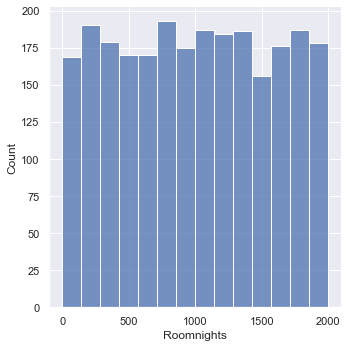

In [75]:
sns.set_theme(style="darkgrid")
sns.displot(data=df , x='Roomnights')

<AxesSubplot:xlabel='Roomnights'>

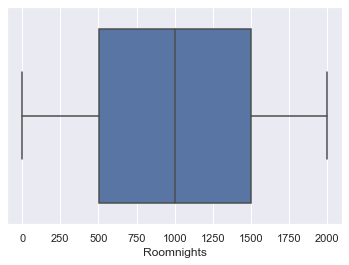

In [76]:
sns.boxplot(data=df , x="Roomnights")

almost no outliers

## - Sale

In [77]:
df["Sale"].describe()

count     2500.000000
mean     25075.458000
std      14904.071915
min         28.000000
25%      12421.500000
50%      24649.000000
75%      37048.500000
max      59130.000000
Name: Sale, dtype: float64

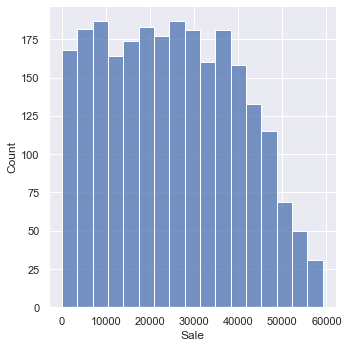

In [78]:
sns.displot(data=df , x='Sale')

<AxesSubplot:xlabel='Sale'>

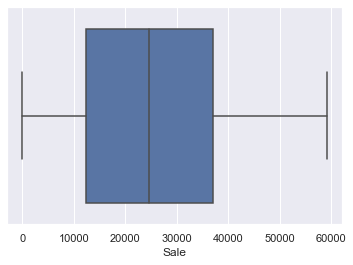

In [79]:
sns.boxplot(data=df , x='Sale')

## - Cost

In [80]:
df['Cost'].describe()

count     2500.000000
mean     17555.022400
std      10300.444627
min         16.000000
25%       8669.000000
50%      17480.000000
75%      25983.250000
max      39720.000000
Name: Cost, dtype: float64

<AxesSubplot:xlabel='Cost', ylabel='Density'>

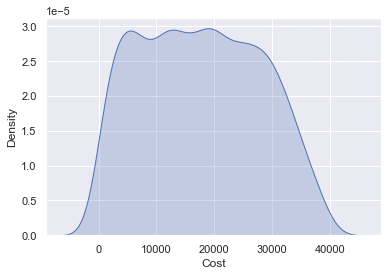

In [81]:
sns.kdeplot(data=df , x='Cost', shade=True)

<AxesSubplot:xlabel='Cost'>

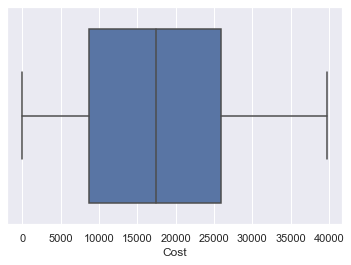

In [82]:
sns.boxplot(data= df , x="Cost")

## - profit

In [84]:
df["profit"].describe()

count     2500.000000
mean      7520.435600
std       6070.726995
min      -1275.000000
25%       2544.000000
50%       6068.000000
75%      11240.250000
max      28350.000000
Name: profit, dtype: float64

### profit with negative value means there are losses in hotels 

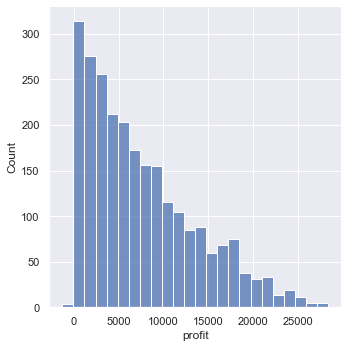

In [85]:
sns.displot(data=df , x='profit')

### distribution show that profit dist. is right skweed ndicates that there are observations at one of the extreme ends of the distribution, this means more frequant date is in the left and decaded ond the right 

<AxesSubplot:xlabel='profit'>

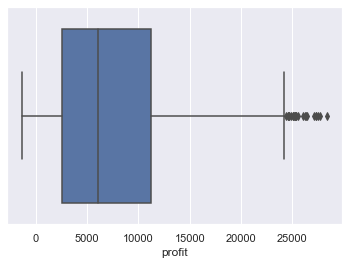

In [86]:
sns.boxplot(data=df , x="profit")

In [88]:
profit_outliers_indicies= detect_outliers(df , 0 , ['profit'])

In [89]:
len(profit_outliers_indicies)

24

In [90]:
df.iloc[ profit_outliers_indicies ]

,Code,Hotel Name,Roomnights,Sale,Cost,month,year,country_name_,profit
14,CODE|87361,Best Western Plus Waterloo,1962,58860,33354,3,2019,united states,25506
73,CODE|85296,Best Western Plus Orangeville Inn & Suites,1951,54628,29265,4,2019,united states,25363
154,CODE|82461,Best Western Plus Fort Wayne Inn & Suites North,1762,52860,28192,11,2019,united states,24668
174,CODE|81761,Best Western Plus Cobourg Inn & Convention Centre,1857,55710,29712,5,2019,united states,25998
219,CODE|80186,Best Western Pembroke Inn & Conference Centre,1948,56492,31168,10,2019,canada,25324
363,CODE|75146,Best Western Hotel International,1805,52345,27075,8,2019,united states,25270
445,CODE|72276,Best Western Darbar Delhi,1673,50190,25095,4,2019,brasil,25095
459,CODE|71786,Best Western City Hotel Moran,1979,57391,29685,11,2019,sverige,27706
520,CODE|69266,Best Western Abbots Barton Hotel,1934,58020,30944,3,2019,missing,27076
584,CODE|67026,Bel Azur Hotel,1947,58410,31152,7,2019,malta,27258


### outliers here respresent an important business value 

In [91]:
outlier_df = df.iloc[ profit_outliers_indicies ]

In [94]:
outlier_df.describe()

,Roomnights,Sale,Cost,month,year,profit
count,24.000000,24.000000,24.000000,24.00000,24.0,24.000000
mean,1876.208333,55806.083333,29965.125000,6.37500,2019.0,25840.958333
std,84.269742,2460.764867,2355.661659,2.99002,0.0,1152.251349
min,1673.000000,50190.000000,25095.000000,2.00000,2019.0,24402.000000
25%,1826.000000,54201.000000,28216.000000,3.75000,2019.0,25025.000000
50%,1892.500000,56596.000000,29912.000000,7.00000,2019.0,25343.500000
75%,1942.500000,57885.000000,32168.250000,8.50000,2019.0,26614.000000
max,1979.000000,58860.000000,33354.000000,11.00000,2019.0,28350.000000


In [93]:
outlier_df["country_name_"].value_counts()

united states     10
france             2
canada             1
brasil             1
sverige            1
missing            1
malta              1
اليمن              1
india              1
éire / ireland     1
قطر                1
philippines        1
united kingdom     1
السعودية           1
Name: country_name_, dtype: int64

### unitied state is the highest 

# - country_name_

In [105]:
df["country_name_"].value_counts().sort_values(ascending=False)

united states     438
missing           284
france            159
españa            156
united kingdom    117
                 ... 
česko               1
việt nam            1
бългaрия            1
sénégal             1
ecuador             1
Name: country_name_, Length: 134, dtype: int64

#  Answers to the below questions and add any metrics that you find important
- Hotels with highest profitability and losses.
- Countries with highest profitability and losses.
- Total Sales per country.
- Cluster the data by room nights into three categories: high demand, mid demand, and low demand 
in a new column and identify the distributio

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           2500 non-null   object
 1   Hotel Name     2500 non-null   object
 2   Roomnights     2500 non-null   int64 
 3   Sale           2500 non-null   int64 
 4   Cost           2500 non-null   int64 
 5   month          2500 non-null   int64 
 6   year           2500 non-null   int64 
 7   country_name_  2500 non-null   object
 8   profit         2500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 175.9+ KB


## Hotels with highest profitability and losses

In [124]:
df.groupby('Hotel Name').sum()['profit'].sort_values(ascending = False).head(200) # highest profitability

Hotel Name
acora Hotel und Wohnen                     28350
Best Western City Hotel Moran              27706
Aber Khamis Mushait                        27495
Arthur Garden Inn Hotel                    27286
Bel Azur Hotel                             27258
                                           ...  
 Ramada Suites Kuala Lumpur City Centre    17800
BEACH PALACE                               17793
Amatara Wellness Resort                    17776
Al Sarab Hotel                             17750
Al Habala Resort                           17740
Name: profit, Length: 200, dtype: int64

In [128]:
df.groupby('Hotel Name').sum()['profit'].sort_values(ascending = False).tail(50) # highest losses

Hotel Name
 La Sommità Relais                                       12
Best Western Plus Island Palms Hotel & Marina             8
Best Western Hazlet Inn                                   0
Amwaj Rotana - JBR                                        0
Aros Alfaisaliah Furnished Units                          0
B Ocean Resort Fort Lauderdale                            0
B&B Hotel Amsterdam-Zaandam                               0
Barcelona Granvia Plaza Espana                            0
B&B Hôtel Marne la Vallée Bussy                           0
acora Hotel und Wohnen Karlsruhe                          0
AC Hotel New York Times Square                            0
Baymont Inn & Suites Denver International Airport         0
Best Western Bretagne Montparnasse                        0
Acca Patong                                               0
Aloft Harlem                                              0
Albuquerque Marriott Pyramid North                        0
Barın Hotel                  

## Countries with highest profitability and losses.

In [134]:
df.groupby('country_name_').sum()['profit'].sort_values(ascending = False)   

country_name_
united states     3233239
missing           2170036
españa            1181224
france            1123554
united kingdom     864151
                   ...   
côte d’ivoire         864
ecuador               490
السودان               258
bénin                  32
zimbabwe               17
Name: profit, Length: 134, dtype: int64

## top 5 highest profitability 

In [149]:
top_5_countries=df.groupby('country_name_').sum()['profit'].sort_values(ascending = False).head(5) #highest five

In [150]:
top_5_countries

country_name_
united states     3233239
missing           2170036
españa            1181224
france            1123554
united kingdom     864151
Name: profit, dtype: int64

In [157]:
pd.DataFrame(data=top_5_countries , index=top_5_countries.index )

,profit
country_name_,
united states,3233239
missing,2170036
españa,1181224
france,1123554
united kingdom,864151


## 10 countries highest losses

In [161]:
highest_losses=df.groupby('country_name_').sum()['profit'].sort_values(ascending = False).tail(10)

In [162]:
pd.DataFrame(data=highest_losses , index=highest_losses.index)

,profit
country_name_,
shqipëria,2496
бългaрия,2076
venezuela,1752
لبنان,1356
việt nam,1041
côte d’ivoire,864
ecuador,490
السودان,258
bénin,32


# Total Sales per country.

In [163]:
x=df.groupby('country_name_').sum()['Sale'].sort_values(ascending = False)

In [164]:
Total_Sales_per_country= pd.DataFrame(data= x , index=x.index)

In [165]:
Total_Sales_per_country

,Sale
country_name_,
united states,10868187
missing,7212163
españa,4095938
france,3713852
united kingdom,2841412
...,...
côte d’ivoire,3168
ecuador,2156
السودان,946


## Cluster the data by room nights into three categories: high demand, mid demand, and low demand in a new column and identify the distributio

In [166]:
df['Roomnights'].describe()

count    2500.000000
mean     1000.586800
std       575.872115
min         1.000000
25%       502.000000
50%      1002.500000
75%      1500.750000
max      1999.000000
Name: Roomnights, dtype: float64

In [168]:
def room_clusturing(row):
    if row >=1500:
        return "high demand"
    elif row<=500 :
        return "low demand"
    else :
        return "mid demand"

In [169]:
df["room_demand"]= df["Roomnights"].apply(room_clusturing)

In [172]:
df["room_demand"].value_counts()

mid demand     1249
high demand     627
low demand      624
Name: room_demand, dtype: int64

<AxesSubplot:xlabel='room_demand', ylabel='count'>

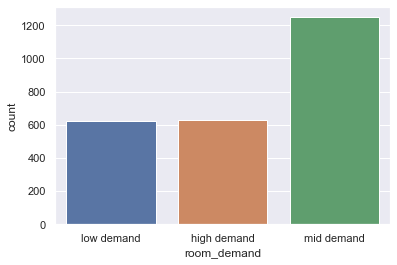

In [175]:
sns.countplot(data= df , x="room_demand" )

# Save modefied version of the dataset¶

In [174]:
df.to_excel("Noorhanhamed_ Modified Hotels Dataset.xlsx")